Arbol de decision

Regresores
Objetivo
antes de la particion
despues de la particion
Precision: 61.33%
MSE: 0.38674492767


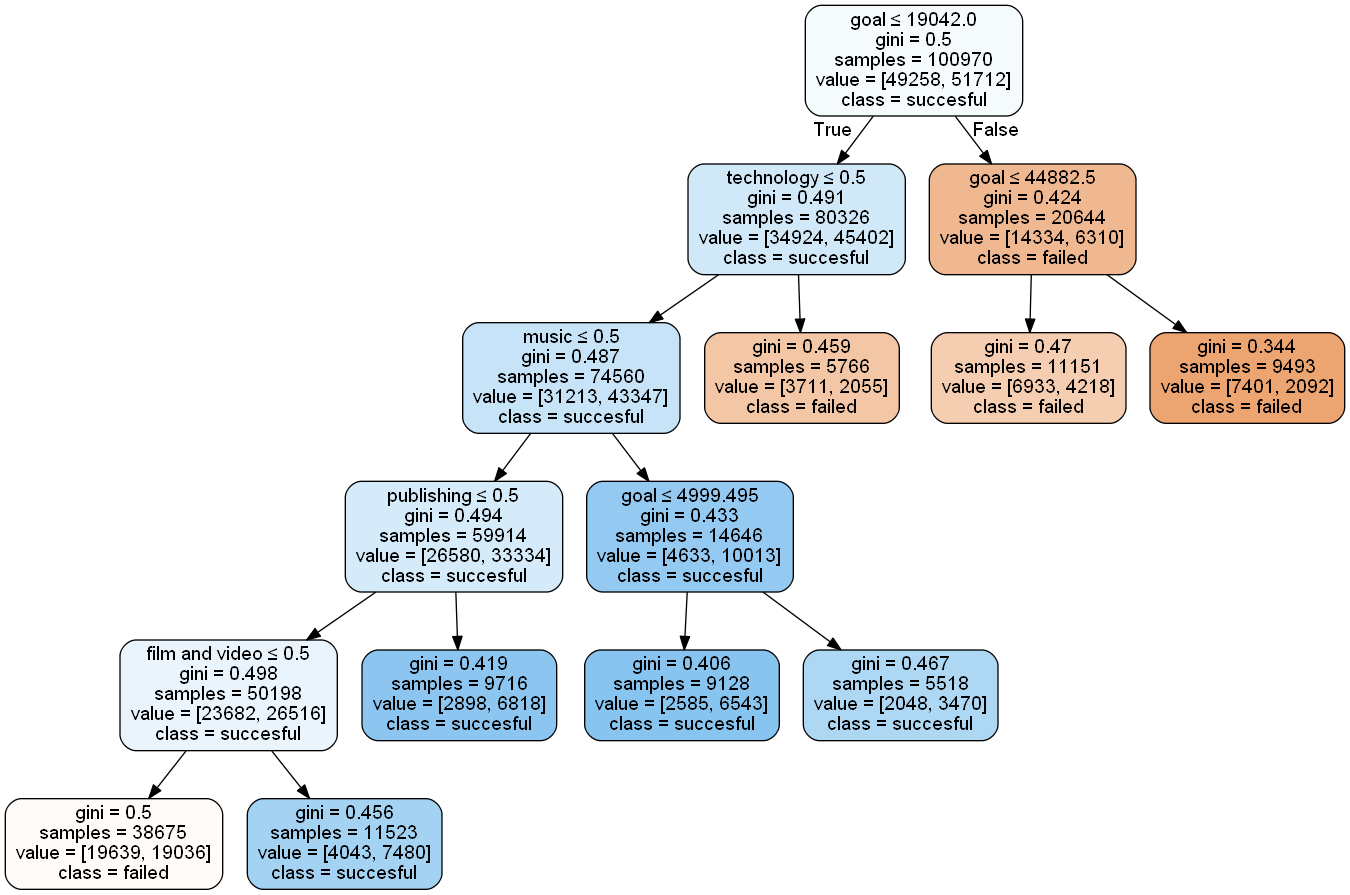

In [16]:

# coding: utf-8

# In[17]:


from sklearn import tree  
import pydotplus  
from IPython.display import Image  
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error

data=pd.read_csv('consolidado.csv',  # el archivo
                    sep = ';',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.',
                    skiprows = 0,
                    header=0)     # separador de los decimales para números

data['semanas_campana'] = ((pd.to_datetime(data['deadline']) - pd.to_datetime(data['launched_at']))/ np.timedelta64(1, 'W')).astype(int)


data['longitud_descripcion']=len(data['blurb'].astype(str))


df_categoria = pd.get_dummies(data['category'])
data = data.join(df_categoria)

cols = ['goal', 'semanas_campana', 'longitud_descripcion', 'art', 'comics', 'crafts',
       'dance', 'design', 'fashion', 'film & video', 'food', 'games',
       'journalism', 'music', 'photography', 'publishing', 'technology',
       'theater', 'state']

data=data[cols]

data.columns=['goal', 'semanas_campana', 'longitud_descripcion', 'art', 'comics', 'crafts',
       'dance', 'design', 'fashion', 'film and video', 'food', 'games',
       'journalism', 'music', 'photography', 'publishing', 'technology',
       'theater', 'state']

cols=data.columns


data["state"]= data['state'].map({'successful': 1, 'failed': 0})
              
data.to_csv("dataset_arbol.csv", sep = ";", na_rep = '', index = False)


#features = list(data.columns[:10])
features = list(cols[:18])
data = data.as_matrix()
data = np.matrix(data)

X_train, X_test, y_train, y_test = train_test_split(
    data[:,:-1], np.ravel(data[:,18:19]), test_size=0.30, random_state=42)

print("despues de la particion")

#Se construye el arbol
clf = tree.DecisionTreeClassifier(max_depth=5 ,min_samples_leaf=5000)
clf = clf.fit(X_train, y_train)


#Poder de prediccion de la clase
y_pred=clf.predict(X_test)

accuracy = sm.accuracy_score(y_test, y_pred)

print("Precision: %.2f%%" % (accuracy*100.0))
print("MSE:",mean_squared_error(y_test, y_pred))


#Se exporta el arbol al formato Graphviz 
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
    
#export_graphviz soporta otras opciones tal como colorear y la funcion Image permite renderizar la imagen en el libro de Ipython
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     class_names=['failed', 'succesful'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  



Ensable de estimadores

In [18]:
from sklearn import tree  
import pydotplus  
from IPython.display import Image  
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier


data=pd.read_csv('consolidado.csv',  # el archivo
                    sep = ';',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.',
                    skiprows = 0,
                    header=0)     # separador de los decimales para números

data['semanas_campana'] = ((pd.to_datetime(data['deadline']) - pd.to_datetime(data['launched_at']))/ np.timedelta64(1, 'W')).astype(int)
#data['tiempo_campana']=pd.to_datetime(data['deadline'])-pd.to_datetime(data['launched_at'])



data['longitud_descripcion']=len(data['blurb'].astype(str))


df_categoria = pd.get_dummies(data['category'])
data = data.join(df_categoria)

cols = ['goal', 'semanas_campana', 'longitud_descripcion', 'art', 'comics', 'crafts',
       'dance', 'design', 'fashion', 'film & video', 'food', 'games',
       'journalism', 'music', 'photography', 'publishing', 'technology',
       'theater', 'state']

data=data[cols]

data.columns=['goal', 'semanas_campana', 'longitud_descripcion', 'art', 'comics', 'crafts',
       'dance', 'design', 'fashion', 'film and video', 'food', 'games',
       'journalism', 'music', 'photography', 'publishing', 'technology',
       'theater', 'state']

cols=data.columns

data["state"]= data['state'].map({'successful': 1, 'failed': 0})

              
data.to_csv("dataset_arbol.csv", sep = ";", na_rep = '', index = False)

#features = list(data.columns[:10])
features = list(cols[:18])
data = data.as_matrix()
data = np.matrix(data)

X_train, X_test, y_train, y_test = train_test_split(
    data[:,:-1], np.ravel(data[:,18:19]), test_size=0.30, random_state=42)


tree1 = DecisionTreeClassifier()

bag = BaggingClassifier(tree1, n_estimators=100, max_samples=0.8, random_state=1)
bag1=bag.fit(X_train, y_train)


y_pred=bag1.predict(X_test)

accuracy = sm.accuracy_score(y_test, y_pred)

print("Precision: %.2f%%" % (accuracy*100.0))
print("MSE:",mean_squared_error(y_test, y_pred))



Precision: 65.64%
MSE: 0.343624347183


Regresion logistica

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

data=pd.read_csv('consolidado.csv',  # el archivo
                    sep = ';',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.',
                    skiprows = 0,
                    header=0)     # separador de los decimales para números


data['semanas_campana'] = ((pd.to_datetime(data['deadline']) - pd.to_datetime(data['launched_at']))/ np.timedelta64(1, 'W')).astype(int)
data['longitud_descripcion']=len(data['blurb'].astype(str))

df_categoria = pd.get_dummies(data['category'])
data = data.join(df_categoria)

cols = ['goal', 'semanas_campana', 'longitud_descripcion', 'art', 'comics', 'crafts',
       'dance', 'design', 'fashion', 'film & video', 'food', 'games',
       'journalism', 'music', 'photography', 'publishing', 'technology',
       'theater', 'state']

data=data[cols]

data.columns=['goal', 'semanas_campana', 'longitud_descripcion', 'art', 'comics', 'crafts',
       'dance', 'design', 'fashion', 'film and video', 'food', 'games',
       'journalism', 'music', 'photography', 'publishing', 'technology',
       'theater', 'state']

cols=data.columns

data["state"]= data['state'].map({'successful': 1, 'failed': 0})


#get the names of all features
features = list(cols[:18])

data = data.as_matrix()
data = np.matrix(data)

X, X_test, y, y_test = train_test_split(
    data[:,:-1], np.ravel(data[:,18:19]), test_size=0.30, random_state=42)

#No se entrega el modelo ajustado
model = SelectFromModel(LogisticRegression(), threshold="2.01*mean")
X_transform = model.fit_transform(X, y)

# train model
selection_model = LogisticRegression()
selection_model.fit(X_transform, y)
# eval model
select_X_test = model.transform(X_test)
y_pred = selection_model.predict(select_X_test)
predictions = [round(value) for value in y_pred]
accuracy = sm.accuracy_score(y_test, predictions)
print(accuracy)
#print("Modelo con %d variables %s. Precision: %.2f%%" % (X_transform.shape[1], features[model.get_support()], accuracy*100.0))

#print("MSE:",mean_squared_error(y_test, y_pred))

0.586980635023
